In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
%matplotlib inline

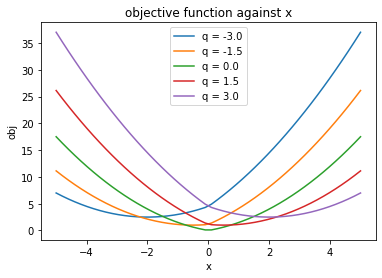

In [11]:
# proximal operator:
lam = 1
q = np.linspace(-3,3,5)
x = np.linspace(-5,5)
plt.title("objective function against x") 
plt.xlabel('x')
plt.ylabel('obj')
for i in q:
    val=[]
    for j in x:
        mim_pro = np.abs(j)*lam+0.5*(j-i)**2
        val.append(mim_pro)
    plt.plot(x, val, label="q = %.1f"%(i))
plt.legend()
plt.savefig('objective function')

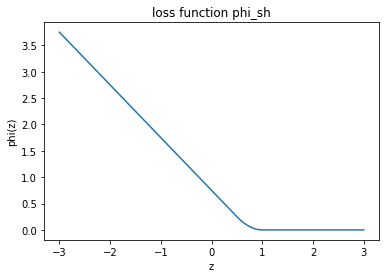

In [23]:
# smoothness
lam = 1.0
gamma = 0.5
fig = plt.figure(1)
plt.title("loss function phi_sh") 
plt.xlabel("z") 
plt.ylabel("phi(z)") 
def piecewise(z):
    if z >= lam: return 0
    if (1-gamma)<z<lam: return 1/(2*gamma)*(1-z)**2
    else: return 1-0.5*gamma-z
    
x=np.linspace(-3,3,100, endpoint=True)
plt.plot(x, list(map(piecewise,x)))
#plt.grid()
# plt.savefig('loss function phi_sh')
# smoothness = 2

In [5]:
# generate toy dataset:
dataset = np.random.uniform(-1,1,(100,2))
po_data = [val for val in dataset if val[0]>0]
ne_data=[val for val in dataset if val[0]<0]

In [7]:
# transfer dataset to dataframe
import pandas as pd

y=[1]*len(po_data)+[-1]*len(ne_data)
po_frame = pd.DataFrame(po_data)
ne_frame = pd.DataFrame(ne_data)
data_frame = pd.concat([po_frame, ne_frame])
data_frame['y'] = y

In [7]:
# visulize the dataset with labels:
# plt.scatter(np.array(po)[::,0],np.array(po)[::,1])
# plt.scatter(np.array(ne)[::,0],np.array(ne)[::,1])

In [2]:
import numpy as np
w1=np.linspace(-5,5,100)
w2=np.linspace(-5,5,100)
w_1,w_2=np.meshgrid(w1,w2)

In [38]:
from numpy import linalg as LA

matrix_1=np.zeros((100,100))
for i in range(len(w1)):
    for j in range(len(w2)):
        matrix_1[i,j]=LA.norm([w1[i],w2[j]])

matrix_2=np.zeros((100,100))
for i in range(100):
    for j in range(100):
        phi_z=[]
        for d in range(len(dataset)):
            z=y[d]*np.dot([w1[i],w2[j]], dataset[d])
            if z>=1:
                phi_z.append(0)
            if 1-gamma<z<1:
                phi_z.append((1-z)**2/(2*gamma))
            else:
                phi_z.append(1-0.5*gamma-z)
        
        matrix_2[i,j]=np.sum(phi_z)/100

F_w = matrix_1*0.5+matrix_2/100

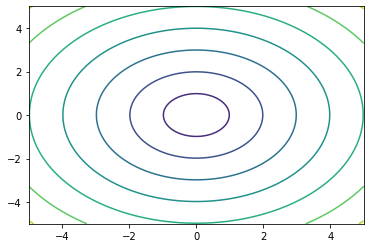

In [39]:
plt.contour(w_1, w_2, F_w)
plt.savefig('Contour  of F_w.png')